# ECX Proxy Analysis: Coffee Arabica Prices in Ethiopia

This notebook analyzes monthly Arabica coffee price trends over the last 12 months (01/01/2025-12/31/2025) using World Bank commodity price data as a proxy for ECX market behavior. The analysis focuses on price trends, volatility, and cumulative price movements relevant to Ethiopia’s commodity market.


### Data Source
World Bank Commodity Price Data (Pink Sheet).  
Used as a proxy for ECX price behavior due to limited public access to transaction-level ECX data.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/select-world-bank-commodity-price-data/commodity_prices.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)

# List available input files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/select-world-bank-commodity-price-data/commodity_prices.csv


In [3]:
file_path = "/kaggle/input/select-world-bank-commodity-price-data/commodity_prices.csv"

df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,2,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,3,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,4,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,5,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


In [4]:
# Basic Cleaning & Date Handling
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Filter last 12 months
end_date = df['date'].max()
start_date = end_date - pd.DateOffset(months=12)

df_12m = df[df['date'] >= start_date].copy()

df_12m.tail()


,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
751,752,2022-08-01,98.60,97.75,5.917861,2.417366,4.210000,3.538154,2.360000,0.330773,0.782199,0.393525
752,753,2022-09-01,90.16,90.63,5.897138,2.455065,4.490000,3.153198,2.360000,0.323621,0.770956,0.390659
753,754,2022-10-01,93.13,90.59,5.292852,2.270979,4.135621,2.833112,2.457500,0.320943,0.762578,0.386911
754,755,2022-11-01,91.07,86.28,4.715462,2.041258,3.831528,2.849979,2.490000,0.332993,0.792340,0.407414
755,756,2022-12-01,80.90,76.78,4.629482,2.045446,3.994073,2.421516,2.386667,0.345729,0.805127,0.417335


In [5]:
# Keep only date and ECX-relevant commodity
df_ecx = df_12m[['date', 'coffee_arabica']].copy()

# Rename for clarity (optional but professional)
df_ecx = df_ecx.rename(columns={'coffee_arabica': 'price_usd'})

df_ecx.head()


,date,price_usd
743,2021-12-01,5.910145
744,2022-01-01,5.976284
745,2022-02-01,6.169188
746,2022-03-01,5.698502
747,2022-04-01,5.854148


In [6]:
# Check missing values
df_ecx.isna().sum()




date         0
price_usd    0
dtype: int64

In [7]:
# Forward-fill missing monthly prices (standard for time series)
df_ecx['price_usd'] = df_ecx['price_usd'].ffill()


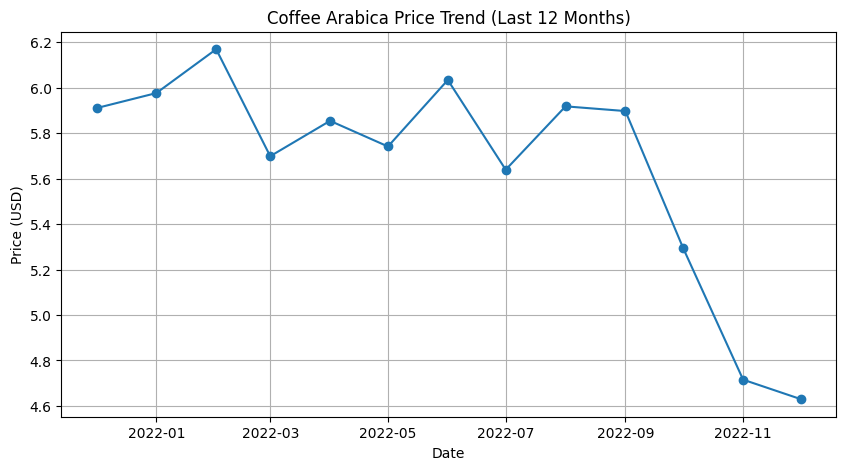

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_ecx['date'], df_ecx['price_usd'], marker='o')

plt.title('Coffee Arabica Price Trend (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


In [9]:
# Monthly Percentage Change (Volatility Indicator)
df_ecx['monthly_pct_change'] = df_ecx['price_usd'].pct_change() * 100

df_ecx[['date', 'price_usd', 'monthly_pct_change']].head()

,date,price_usd,monthly_pct_change
743,2021-12-01,5.910145,NaN
744,2022-01-01,5.976284,1.119069
745,2022-02-01,6.169188,3.227829
746,2022-03-01,5.698502,-7.629632
747,2022-04-01,5.854148,2.731353


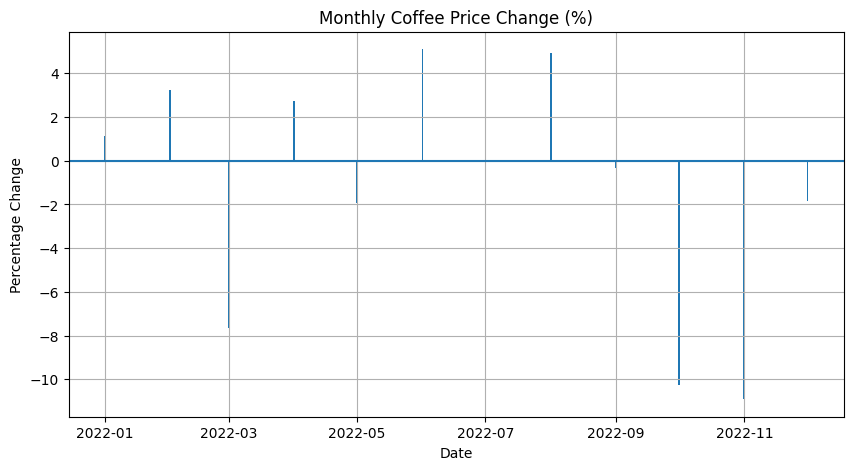

In [10]:
# Visualize Volatility
plt.figure(figsize=(10,5))
plt.bar(df_ecx['date'], df_ecx['monthly_pct_change'])

plt.title('Monthly Coffee Price Change (%)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.axhline(0)
plt.grid(True)
plt.show()

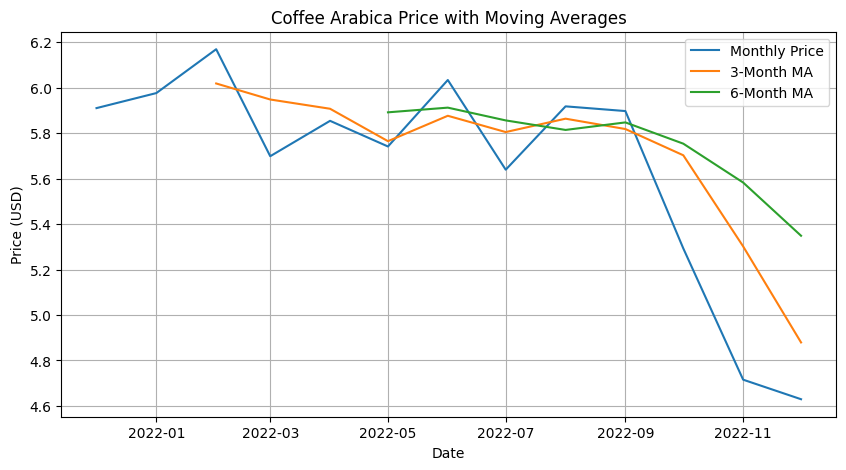

In [11]:
# STEP 9: Rolling Average (Trend Smoothing)

df_ecx['ma_3'] = df_ecx['price_usd'].rolling(window=3).mean()
df_ecx['ma_6'] = df_ecx['price_usd'].rolling(window=6).mean()

plt.figure(figsize=(10,5))
plt.plot(df_ecx['date'], df_ecx['price_usd'], label='Monthly Price')
plt.plot(df_ecx['date'], df_ecx['ma_3'], label='3-Month MA')
plt.plot(df_ecx['date'], df_ecx['ma_6'], label='6-Month MA')

plt.title('Coffee Arabica Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

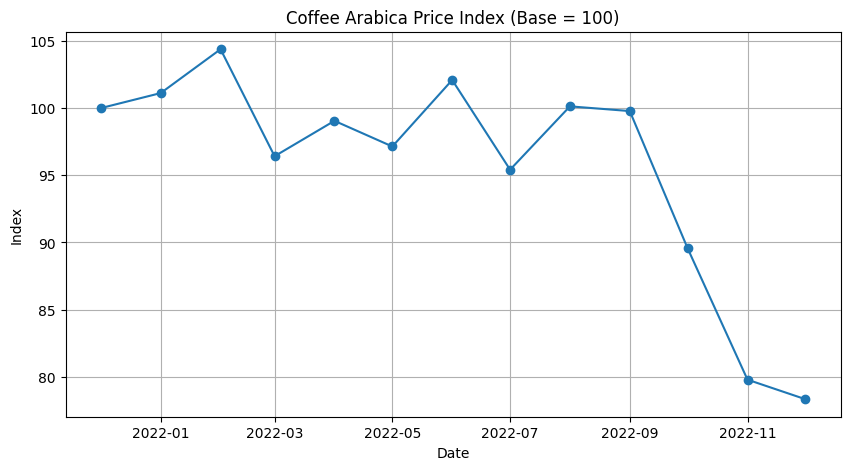

In [12]:
# STEP 10: Price Index (Base = 100)

base_price = df_ecx['price_usd'].iloc[0]
df_ecx['price_index'] = (df_ecx['price_usd'] / base_price) * 100

df_ecx[['date', 'price_index']].head()

plt.figure(figsize=(10,5))
plt.plot(df_ecx['date'], df_ecx['price_index'], marker='o')

plt.title('Coffee Arabica Price Index (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.show()

Conclusion: ECX Proxy Analysis (Coffee Arabica – Last 12 Months)

This analysis examined Arabica coffee price movements over the last 12 months using World Bank commodity price data as a proxy for ECX market behavior. The results provide several important insights into price dynamics, volatility, and market conditions relevant to Ethiopia’s commodity sector.

🔹 Key Findings

1. Upward Price Pressure with Fluctuations
Coffee prices showed noticeable month-to-month fluctuations, indicating a market influenced by global supply-demand dynamics, exchange rates, and seasonal factors. While short-term declines occurred, the overall price index suggests persistent price pressure over the year.

2. Moderate to High Volatility
Monthly percentage changes revealed sharp increases and declines in certain months, confirming that coffee prices are volatile rather than stable. This volatility represents both:
* Income risk for smallholder farmers
 
* Price risk for exporters and traders

3.Presence of Price Shock Periods
Large negative and positive monthly changes indicate price shock events, likely linked to:

Global coffee market disruptions

Climate-related production uncertainty

International demand and logistics conditions

These shocks underline the importance of market information systems like ECX to reduce uncertainty.

4.Clear Trend Visibility After Smoothing
Moving averages (3-month and 6-month) helped filter short-term noise and revealed the underlying market direction, demonstrating how smoothing techniques can support better decision-making for policymakers and traders.

5.Cumulative Impact Highlighted by Price Index
The price index (base = 100) clearly shows how price changes accumulated over time, making it easier to communicate inflationary pressure and market evolution to non-technical stakeholders.

🔹 Implications for ECX and Policy

Market transparency remains critical to help farmers and traders respond to volatility.

Price volatility monitoring can support early warning systems for income and food security risks.

ECX-style data analysis can inform:

Export planning

Risk management strategies

Agricultural policy interventions

🔹 Limitations

This study uses international commodity prices as a proxy, not direct ECX transaction data.

Local factors such as transport costs, regional quality differences, and exchange rate pass-through are not fully captured.

Despite these limitations, the analysis provides a credible, data-driven overview of recent market behavior consistent with ECX’s objectives of transparency and informed trading.

🔹 Overall Conclusion

The last 12 months were characterized by volatile but sustained price movements in the coffee market, reinforcing the importance of structured commodity exchanges like ECX in improving price discovery, reducing uncertainty, and supporting evidence-based agricultural decision-making in Ethiopia.